# **Introduction to R (Iris & Mtcars)**

*by Natalia Zelenko*

**Datasets:** Iris and Mtcars (built-in R datasets)

**Goal:** To explore basic R workflows through a short analysis of two classic datasets, using simple visualizations, grouped summaries, and statistical tests to examine relationships and differences between variables.

**About the datasets:**

Iris includes measurements of three iris species and is widely used for introductory multivariate analysis. Mtcars contains automotive performance data and is commonly used for practicing correlations, grouped comparisons, and simple exploratory plots.

**Note on the choices:**

The visualizations in this notebook follow the structure of the lab assignment rather than a unified analytical story. Each plot type and test demonstrates a specific R capability—such as pair plots, boxplots, etc. - which is why the sequence may feel more instructional than exploratory when viewed as a whole.

## **1. Imports and setup**

In [2]:
# install libraries
library(ggplot2)
library(dplyr)

install.packages("GGally")
library(GGally)
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘patchwork’, ‘ggstats’




In [3]:
# load datasets
data(iris)
data(mtcars)

In [4]:
# take a peek at the datasets
head(iris)
head(mtcars)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


## **2. IRIS**

### **2.1 EDA**

First, we inspect the structure and summary statistics of the Iris dataset.

In [5]:
# look at the structure
str(iris)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


In [6]:
# look at the summary
summary(iris)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

Now let's explore some visualizations.

In [7]:
# inspect species to assign colors to
levels(iris$Species)

[1] "setosa"     "versicolor" "virginica"

In [8]:
# define the palette
species_colors <- c(
  setosa     = "#6A5ACD",
  versicolor = "#E3C565",
  virginica  = "#66A182"
)

outline_color = "#4E5842"

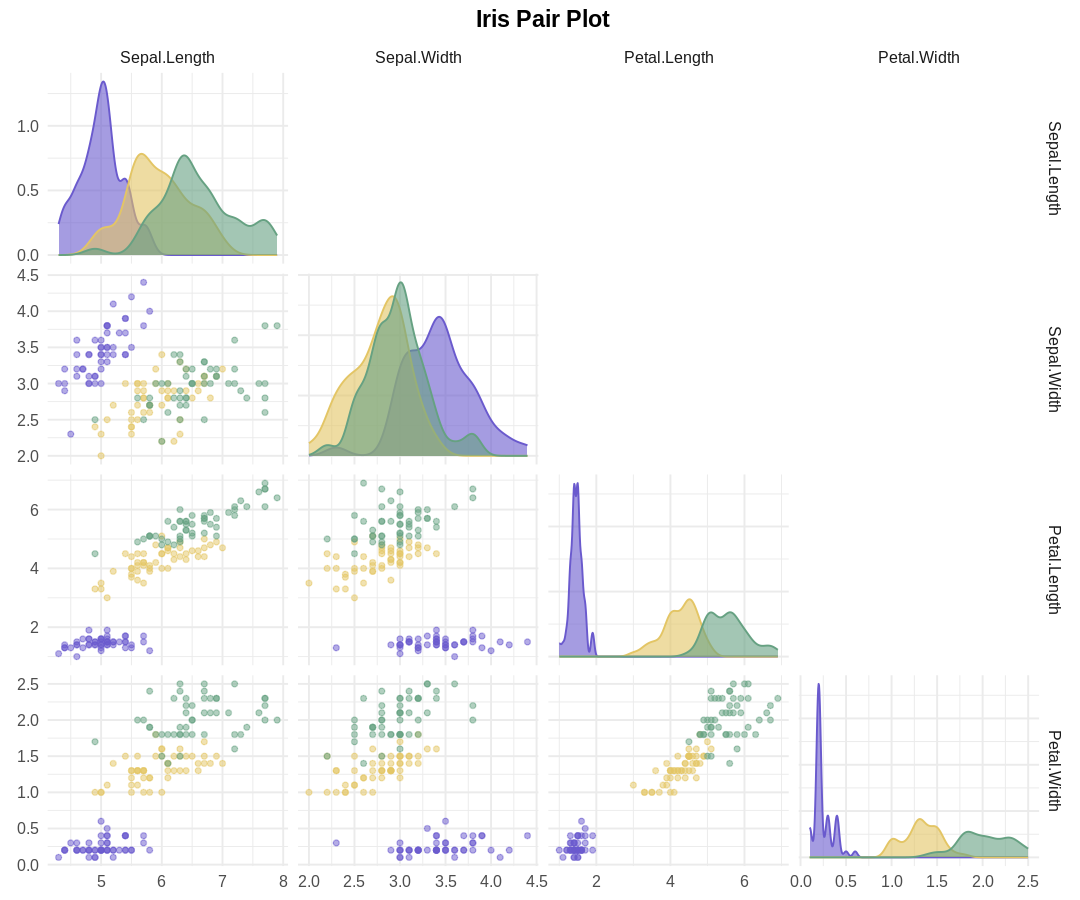

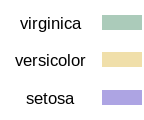

In [9]:
# build the plot
options(repr.plot.width = 9, repr.plot.height = 7.5)
ggpairs(
  iris,
  columns = 1:4,
  mapping = aes(color = Species, fill = Species),
  title = "Iris Pair Plot",
  upper   = "blank",
  lower = list(continuous = wrap("points", alpha = 0.5, size = 1.3)),
  diag  = list(continuous = wrap("densityDiag", alpha = 0.6, adjust = 0.8))
) +
  scale_color_manual(values = species_colors, aesthetics = c("colour", "fill")) +
  theme_minimal(base_size = 12) +
  theme(
    legend.position = "bottom",
    plot.title = element_text(face = "bold", hjust = 0.5, size = 14)
  )

legend_df <- data.frame(Species = names(species_colors))
options(repr.plot.width = 1.2, repr.plot.height = 1)
  ggplot(legend_df, aes(x = Species, y = 1, fill = Species, alpha=0.7)) +
    geom_col(width = 0.4) +
    scale_fill_manual(values = species_colors) +
    coord_flip() +
    theme_void() +
    theme(
      legend.position = "none",
      plot.margin = margin(0, 0, 0, 0, "pt"),
      axis.text.y = element_text(size = 10, hjust = 0.5)
    )




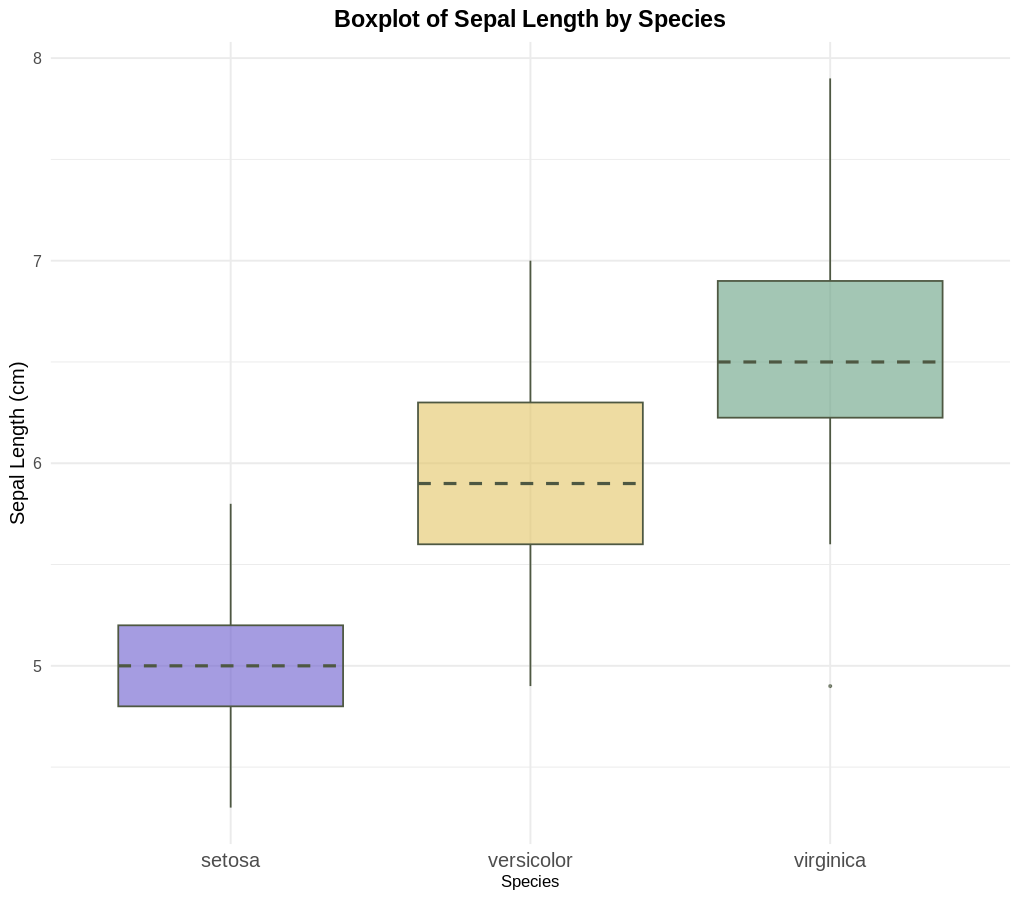

In [10]:
# boxplot of sepal length by species
options(repr.plot.width = 8.5, repr.plot.height = 7.5)
ggplot(iris, aes(x = Species, y = Sepal.Length, fill = Species)) +
  geom_boxplot(color = outline_color, alpha = 0.6, size = 0.5, median.linewidth = 0.9, median.linetype = 2) +
  scale_fill_manual(values = species_colors) +
  ggtitle("Boxplot of Sepal Length by Species") +
  xlab("Species") +
  ylab("Sepal Length (cm)") +
  theme_minimal(base_size = 12) +
  theme(
    legend.position = "none",
    plot.title = element_text(face = "bold", hjust = 0.5, size = 14),
    axis.title.x = element_text(size = 10, face = "plain"),
    axis.text.x  = element_text(size = 12, face = "plain"),
    axis.title.y = element_text(size = 12, face = "plain")
  )


### **2.2 Statistical test**

We now perform an ANOVA (Analysis of Variance) test. The question we will be answering:

*Are there statistically significant differences in sepal lengths among different species?*

In [11]:
# raw ANOVA test for sepal length
anova_results <- aov(Sepal.Length ~ Species, data = iris)
anova_summary <- summary(anova_results)
print(anova_summary)


             Df Sum Sq Mean Sq F value Pr(>F)    
Species       2  63.21  31.606   119.3 <2e-16 ***
Residuals   147  38.96   0.265                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [12]:
# extraction of F-value and p-value
f_value <- anova_summary[[1]]$`F value`[1]
p_value <- anova_summary[[1]]$`Pr(>F)`[1]

cat("F-value:", round(f_value, 2), "\n")
cat("p-value:", format(p_value, digits = 3), "\n\n")

if (p_value < 0.05) {
    cat("Result: Significant difference in sepal length among species (p < 0.05).\n")
} else {
    cat("Result: No significant difference in sepal length among species (p >= 0.05).\n")
}

F-value: 119.26 
p-value: 1.67e-31 

Result: Significant difference in sepal length among species (p < 0.05).


### **2.3 Conclusion**

The Iris dataset shows clear differences in sepal length across species. ANOVA confirms that these differences are statistically significant, with Setosa having the shortest sepals, Virginica the longest, and Versicolor in between. Sepal length therefore serves as a strong distinguishing feature between the species.

## **3. MTCARS**

### **3.1 EDA**

First, we inspect the structure and summary statistics of the mtcars dataset.

In [13]:
# look at the structure
str(mtcars)

'data.frame':	32 obs. of  11 variables:
 $ mpg : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl : num  6 6 4 6 8 6 8 4 4 6 ...
 $ disp: num  160 160 108 258 360 ...
 $ hp  : num  110 110 93 110 175 105 245 62 95 123 ...
 $ drat: num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt  : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec: num  16.5 17 18.6 19.4 17 ...
 $ vs  : num  0 0 1 1 0 1 0 1 1 1 ...
 $ am  : num  1 1 1 0 0 0 0 0 0 0 ...
 $ gear: num  4 4 4 3 3 3 3 4 4 4 ...
 $ carb: num  4 4 1 1 2 1 4 2 2 4 ...


In [14]:
# look at the summary
summary(mtcars)

      mpg             cyl             disp             hp       
 Min.   :10.40   Min.   :4.000   Min.   : 71.1   Min.   : 52.0  
 1st Qu.:15.43   1st Qu.:4.000   1st Qu.:120.8   1st Qu.: 96.5  
 Median :19.20   Median :6.000   Median :196.3   Median :123.0  
 Mean   :20.09   Mean   :6.188   Mean   :230.7   Mean   :146.7  
 3rd Qu.:22.80   3rd Qu.:8.000   3rd Qu.:326.0   3rd Qu.:180.0  
 Max.   :33.90   Max.   :8.000   Max.   :472.0   Max.   :335.0  
      drat             wt             qsec             vs        
 Min.   :2.760   Min.   :1.513   Min.   :14.50   Min.   :0.0000  
 1st Qu.:3.080   1st Qu.:2.581   1st Qu.:16.89   1st Qu.:0.0000  
 Median :3.695   Median :3.325   Median :17.71   Median :0.0000  
 Mean   :3.597   Mean   :3.217   Mean   :17.85   Mean   :0.4375  
 3rd Qu.:3.920   3rd Qu.:3.610   3rd Qu.:18.90   3rd Qu.:1.0000  
 Max.   :4.930   Max.   :5.424   Max.   :22.90   Max.   :1.0000  
       am              gear            carb      
 Min.   :0.0000   Min.   :3.000  

Now let's explore some visualizations.

In [15]:
# define the palette
polluted_metropolis_colour = "#4B515D"
carsickness_nostalgia_color = "#70783D"
depressing_grey_1 = "#555555"
depressing_grey_2 = "#2F2F2F"

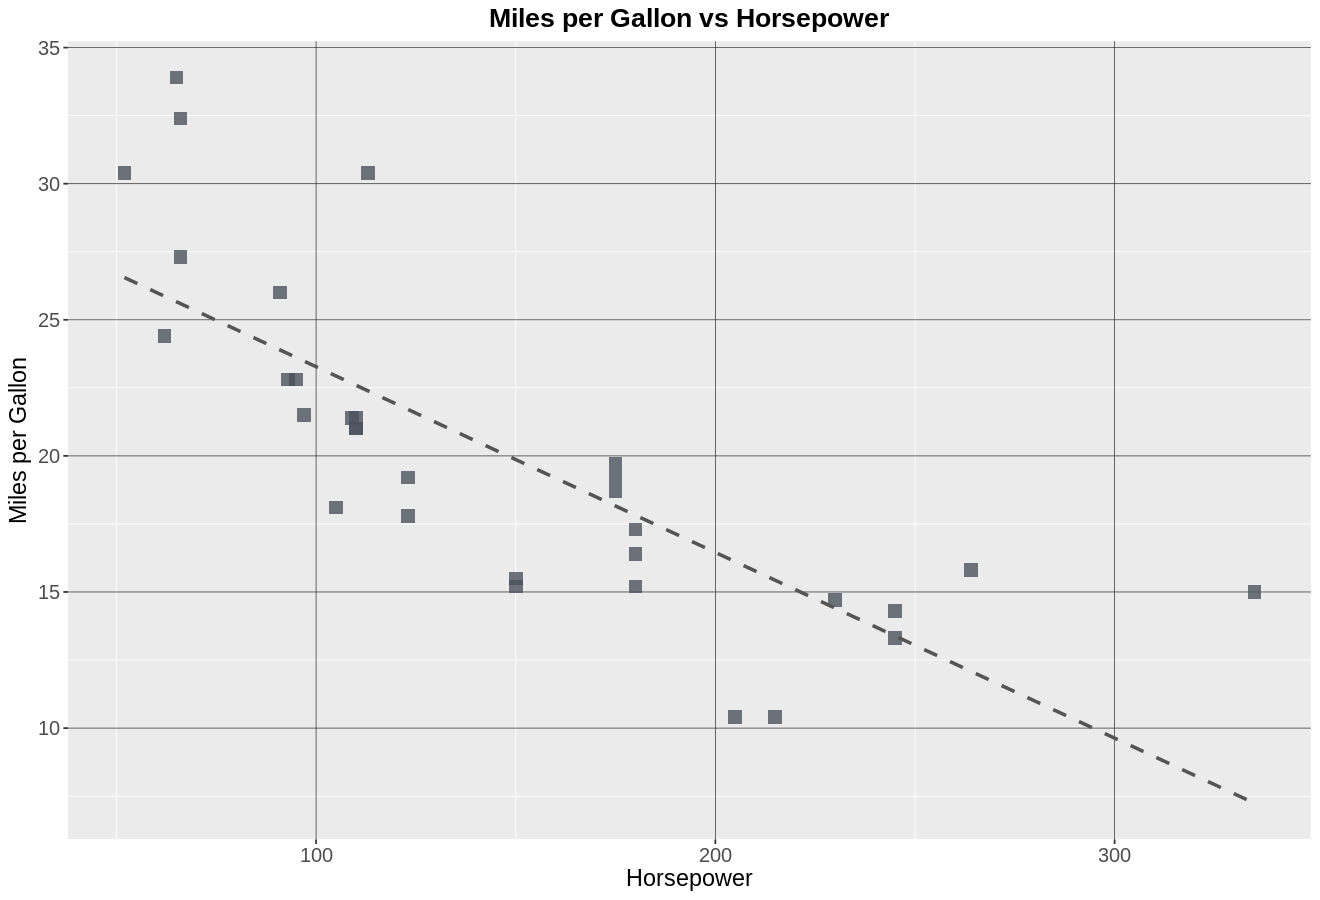

In [16]:
# scatter plot of mpg vs hp
options(repr.plot.width = 11, repr.plot.height = 7.5)
ggplot(mtcars, aes(x = hp, y = mpg)) +
  geom_point(color = polluted_metropolis_colour, size=3.5, alpha=0.8, shape=15) +
  geom_smooth(formula = y ~ x, method="lm", color=depressing_grey_1, se=FALSE, linetype="dashed") +
  ggtitle("Miles per Gallon vs Horsepower") +
  xlab("Horsepower") +
  ylab("Miles per Gallon") +
  theme(
    plot.title = element_text(face = "bold", hjust = 0.5, size = 16),
    axis.title.x = element_text(size = 14, face = "plain"),
    axis.text.x  = element_text(size = 12, face = "plain"),
    axis.text.y  = element_text(size = 12, face = "plain"),
    axis.title.y = element_text(size = 14, face = "plain"),
    panel.grid.major = element_line(color = depressing_grey_2, linewidth = 0.2)
  )


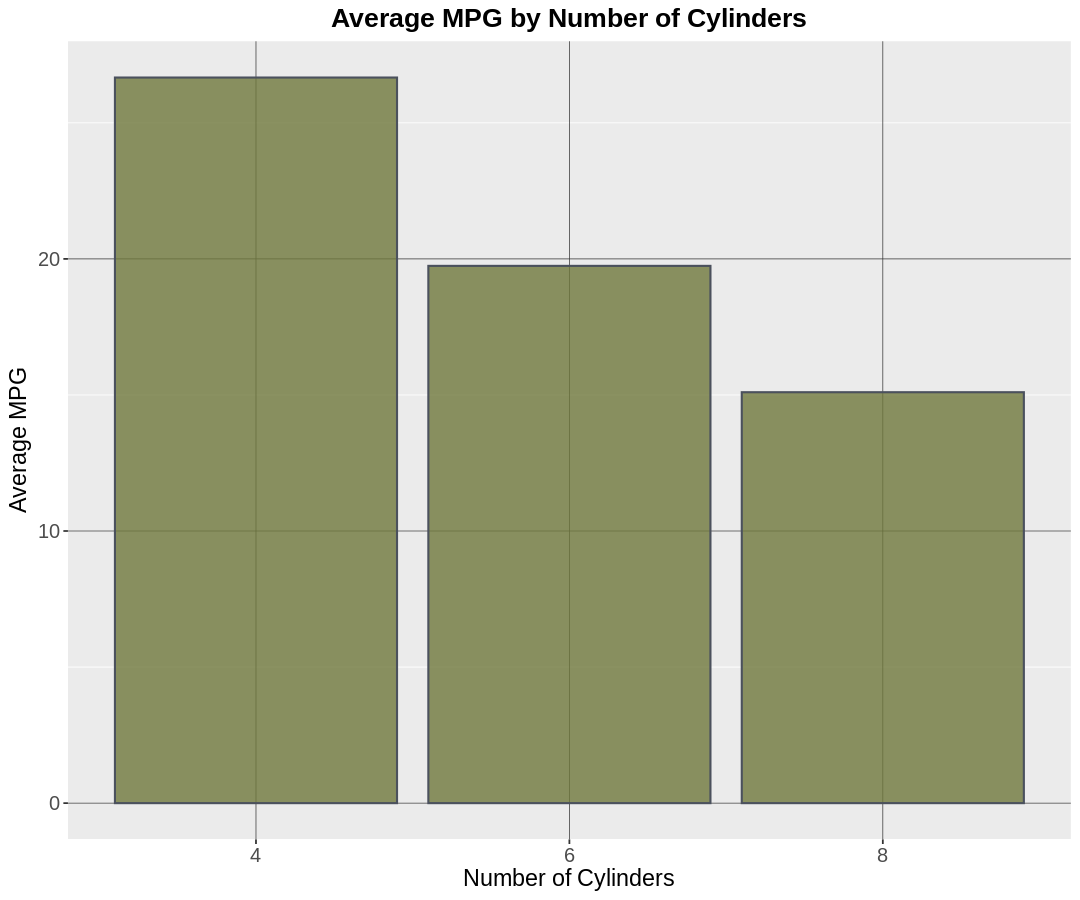

In [17]:
# bar graph of average mpg by number of cylinders
options(repr.plot.width = 9, repr.plot.height = 7.5)
mtcars %>%
  group_by(cyl) %>%
  summarise(average_mpg = mean(mpg)) %>%
  ggplot(aes(x = as.factor(cyl), y = average_mpg)) +
  geom_bar(stat = "identity", fill = carsickness_nostalgia_color, color=polluted_metropolis_colour, linewidth=0.6, alpha=0.8) +
  ggtitle("Average MPG by Number of Cylinders") +
  xlab("Number of Cylinders") +
  ylab("Average MPG") +
  theme(
    plot.title = element_text(face = "bold", hjust = 0.5, size = 16),
    axis.title.x = element_text(size = 14, face = "plain"),
    axis.text.x  = element_text(size = 12, face = "plain"),
    axis.text.y  = element_text(size = 12, face = "plain"),
    axis.title.y = element_text(size = 14, face = "plain"),
    panel.grid.major = element_line(color = depressing_grey_2, linewidth = 0.2)
  )


### **3.2 Statistical test**

In [18]:
# raw result: correlation test between hp and mpg
cor_result <- cor.test(mtcars$hp, mtcars$mpg)
cor_result



	Pearson's product-moment correlation

data:  mtcars$hp and mtcars$mpg
t = -6.7424, df = 30, p-value = 1.788e-07
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.8852686 -0.5860994
sample estimates:
       cor 
-0.7761684 


In [20]:
# extraction of correlation coefficient and p-value
cor_coef <- cor_result$estimate
p_value <- cor_result$p.value

cat("Correlation coefficient:", round(cor_coef, 3), "\n")
cat("p-value:", format(p_value, digits = 3), "\n\n")

if (p_value < 0.05) {
    cat("Result: Significant negative correlation between horsepower and mpg (p < 0.05).\n")
} else {
    cat("Result: No statistically significant correlation between horsepower and mpg (p >= 0.05).\n")
}

Correlation coefficient: -0.776 
p-value: 1.79e-07 

Result: Significant negative correlation between horsepower and mpg (p < 0.05).


### **3.3 Conclusion**

The mtcars dataset shows a clear negative relationship between horsepower and fuel efficiency: cars with higher horsepower achieve lower miles per gallon. The correlation test confirms that this relationship is statistically significant (r ≈ –0.78, p < 0.001). Average MPG also decreases as the number of cylinders increases, indicating that larger engines tend to be less fuel-efficient.